# Airbnb Listing Analysis

### Importing the dependencies


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing the data
Listings = pd.read_csv(r'C:\Users\shafi\Downloads\Airbnb+Data\Airbnb Data\Listings.csv', encoding='ISO-8859-1',low_memory=False)

In [4]:
Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

##### It can be seen that the 'host_since' column is shown here as a object although it should be in date format

In [6]:
Listings['host_since'] = pd.to_datetime(Listings['host_since'])
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

### Filtering only the records that we need

In [7]:
Paris_listings = (
                   Listings
                  .query("city == 'Paris'")
                  .loc[:,["host_since","neighbourhood","city","accommodates","price"]]
                  )
Paris_listings.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [8]:
# Checking the missing values

Paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [9]:
Paris_listings.dropna(inplace=True)

In [10]:
Paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [11]:
Paris_listings.describe(include=[np.number])

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [12]:
Paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

### Preparing data for visualization

In [13]:
# Finding neighborhood with the highest prices
Paris_listings_neighbourhood = (
    Paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values('price')
)

Paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.891525
Passy,161.190476
Louvre,175.379972
Elysee,210.536765


In [14]:
# Finding the highest accomodate price for the most expensive neighbourhood

Paris_listings_accomodates = (
     Paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values(by="price")
)

Paris_listings_accomodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [15]:
Paris_listings_overtime = (
    Paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({"neighbourhood":"count",
          "price":"mean"})
)

Paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Visualizing the Data

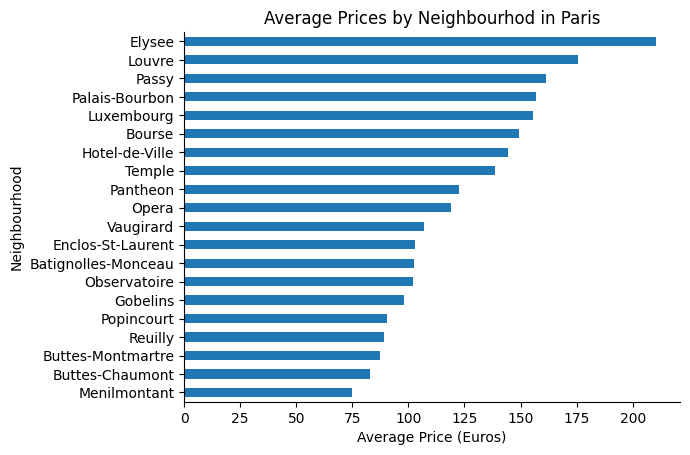

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
Paris_listings_neighbourhood.plot(kind='barh', legend=None)
plt.xlabel('Average Price (Euros)')
plt.ylabel('Neighbourhood')
plt.title('Average Prices by Neighbourhod in Paris')
sns.despine()
plt.show()

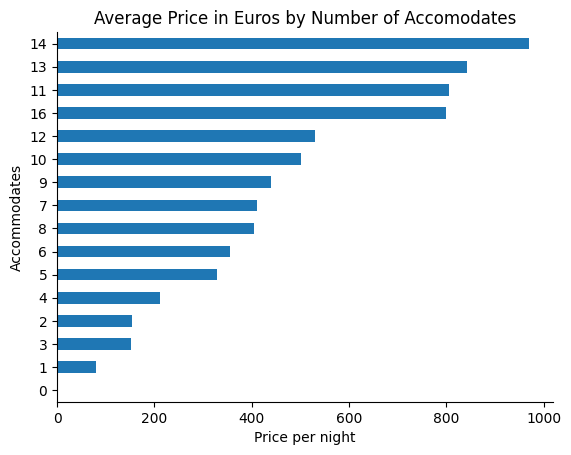

In [17]:
(Paris_listings_accomodates
 .plot.barh(title='Average Price in Euros by Number of Accomodates',
            xlabel='Price per night',
            ylabel='Accommodates',
            legend=None )    
            )
sns.despine()

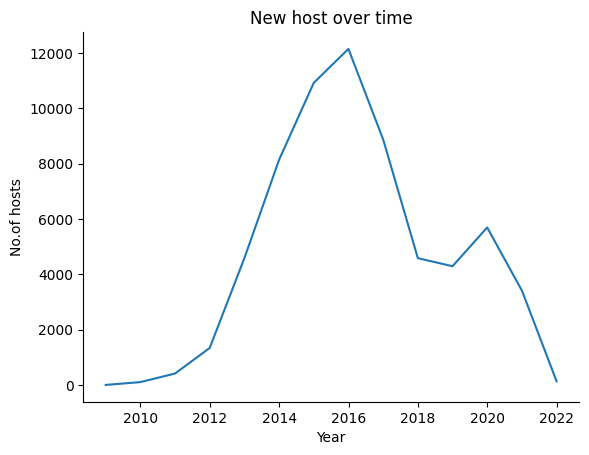

In [18]:
sns.lineplot(data=Paris_listings_overtime,x='host_since',y='neighbourhood')
plt.title('New host over time')
plt.xlabel('Year')
plt.ylabel('No.of hosts')

# Removing the top and right spines
sns.despine()

# Display the plot
plt.show()


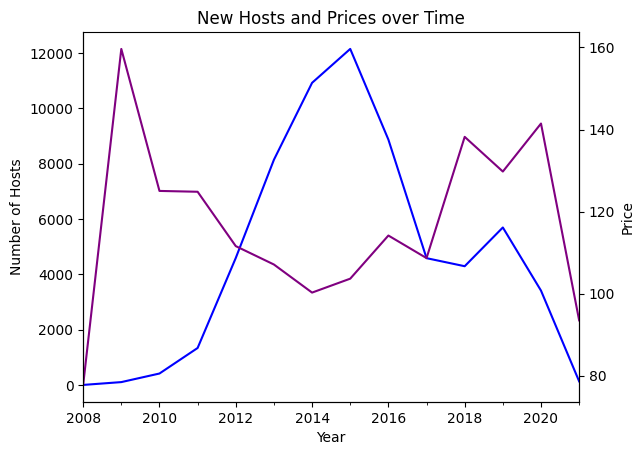

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the first line for the count of neighbourhoods
ax = Paris_listings_overtime['neighbourhood'].plot.line(label='Number of Hosts', color='blue')

# Plotting the second line for the mean price on the same axis
Paris_listings_overtime['price'].plot.line(ax=ax, secondary_y=True, label='Price', color='purple')

# Adding titles and labels
plt.title('New Hosts and Prices over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Hosts')
ax.right_ax.set_ylabel('Price')

# Removing the top and right spines
sns.despine(ax=ax,right=False)

# Display the plot
plt.show()


* It can be seen from the above graph that after the 2015 regulation on airbnb listings in Paris, the amount of new_hosts have decreased drastically, also the increase in Prices can be the result of less host leading to higher prices since there are not many options to choose from.